In [ ]:
!pip install -q jmd_imagescraper

     |████████████████████████████████| 1.6 MB 13.6 MB/s 


In [ ]:
from pathlib import Path
root = Path().cwd()/"images"

from jmd_imagescraper.core import *
duckduckgo_search(root, "fashion", "shirts", max_results=10)
duckduckgo_search(root, "fashion", "pants", max_results=10)
duckduckgo_search(root, "fashion", "shoes", max_results=10)
duckduckgo_search(root, "fashion", "skirts", max_results=10)

Duckduckgo search: shirts


Duckduckgo search: pants


Duckduckgo search: shoes


Duckduckgo search: skirts


[PosixPath('/content/images/fashion/031_11fb2fdb.jpg'),
 PosixPath('/content/images/fashion/032_266715e9.jpg'),
 PosixPath('/content/images/fashion/033_6b37a3d5.jpg'),
 PosixPath('/content/images/fashion/034_c12b0e7e.jpg'),
 PosixPath('/content/images/fashion/035_ea583149.jpg'),
 PosixPath('/content/images/fashion/036_1870137a.jpg'),
 PosixPath('/content/images/fashion/037_47228cb7.jpg'),
 PosixPath('/content/images/fashion/038_f2ea0484.jpg'),
 PosixPath('/content/images/fashion/039_4f694c04.jpg'),
 PosixPath('/content/images/fashion/040_98b2938c.jpg')]

In [ ]:
params = {
    "max_results": 40,
    "img_size":    ImgSize.Cached,
    "img_type":    ImgType.Photo,
    "img_layout":  ImgLayout.Square,
    "img_color":   ImgColor.Purple
}


In [ ]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

553467096/553467096 [==============================] - 17s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

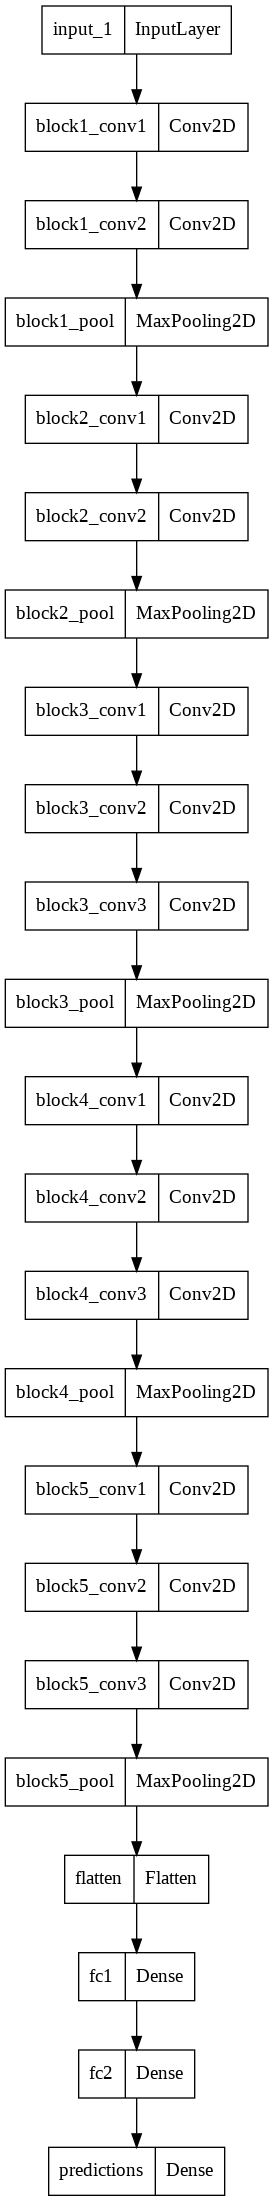

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

shape of x:  (1, 224, 224, 3)
data type:  float32


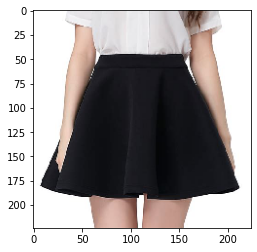

In [ ]:
#path = keras.utils.load_img("/content/images/fashion/003_d5acf857.jpg")
#print("shape of x: ", x.shape)
#print("data type: ", x.dtype)
#plt.imshow(img)
import numpy as np
from matplotlib import pyplot as plt

#experiment
img = keras.utils.load_img("/content/images/fashion/032_266715e9.jpg",target_size=model.input_shape[1:3])
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

In [ ]:
# forward the image through the network
predictions = model.predict(x)

1/1 [==============================] - 2s 2s/step


In [ ]:
# print out the
for _, pred, prob in decode_predictions(predictions)[0]:
    print("predicted %s with probability %0.3f" % (pred, prob))

35363/35363 [==============================] - 0s 0us/step
predicted miniskirt with probability 0.919
predicted trench_coat with probability 0.029
predicted velvet with probability 0.019
predicted overskirt with probability 0.019
predicted hoopskirt with probability 0.008


In [ ]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

1/1 [==============================] - 2s 2s/step


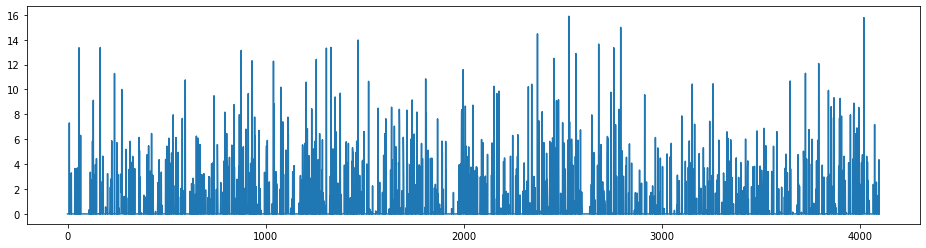

In [ ]:
x = keras.utils.load_img("/content/images/fashion/032_266715e9.jpg",target_size=model.input_shape[1:3])
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
feat = feat_extractor.predict(x)

plt.figure(figsize=(16,4))
plt.plot(feat[0])

In [ ]:
images_path = '/content/images/fashion'
import random
image_extensions = ['.jpg', '.png', '.jpeg']   # case-insensitive (upper/lower doesn't matter)
max_num_images = 40

In [ ]:
images = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
len(images)

40

In [ ]:
if max_num_images > len(images):
    images = [images[i] for i in sorted(random.sample(range(len(images)), max_num_images))]

print("keeping %d images to analyze" % len(images))

keeping 40 images to analyze


In [ ]:
import time
tic = time.clock()


features = []
for i, image_path in enumerate(images,0):
    if i % 500 == 0:
        toc = time.clock()
        elap = toc-tic;
        print("analyzing image %d / %d. Time: %4.4f seconds." % (i, len(images),elap))
        tic = time.clock()
    img = keras.utils.load_img(image_path,target_size=model.input_shape[1:3])
    x = keras.utils.load_img(image_path,target_size=model.input_shape[1:3])
    x = np.expand_dims(x, axis=0)
    #x = np.array(x)

    #x = preprocess_input(x)

    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(images))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # This is added back by InteractiveShellApp.init_path()


analyzing image 0 / 40. Time: 0.0008 seconds.
1/1 [==============================] - 1s 575ms/step
finished extracting features for 40 images


In [ ]:
from sklearn.decomposition import PCA
features = np.array(features)
pca = PCA(n_components=40)
#features.reshape(1,-1)
pca.fit(features)

PCA(n_components=40)

In [ ]:
pca_features = pca.transform(features)

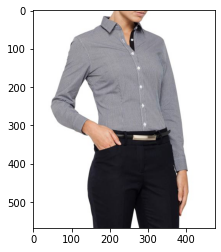

In [ ]:
import random

# grab a random query image
query_image_idx = int(len(images) * random.random())

# let's display the image
img = keras.utils.load_img(images[query_image_idx])
plt.imshow(img)

In [ ]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [ ]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

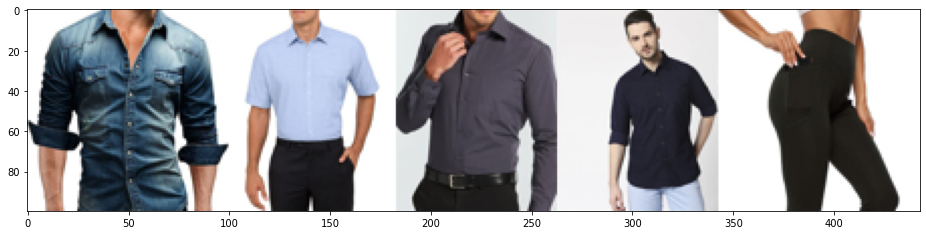

In [ ]:
# load all the similarity results as thumbnails of height 100
thumbs = []
for idx in idx_closest:
    img = keras.utils.load_img(images[idx])
    img = img.resize((int(img.width * 100 / img.height), 100))
    thumbs.append(img)

# concatenate the images into a single image
concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)

# show the image
plt.figure(figsize = (16,12))
plt.imshow(concat_image)

In [ ]:
def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = keras.utils.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image


Text(0.5, 1.0, 'result images')

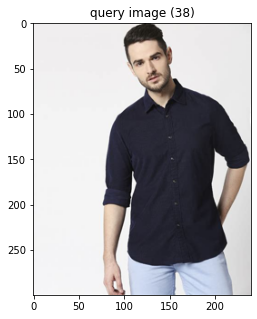

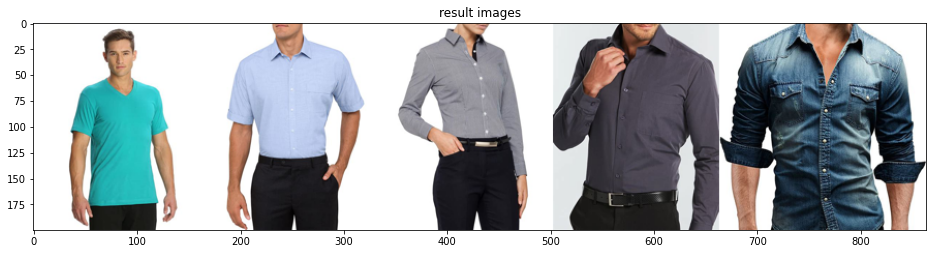

In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

Text(0.5, 1.0, 'result images')

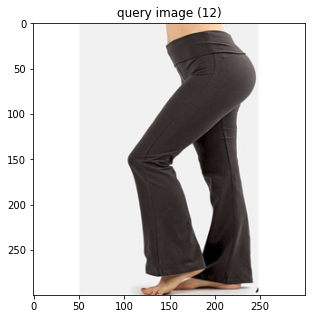

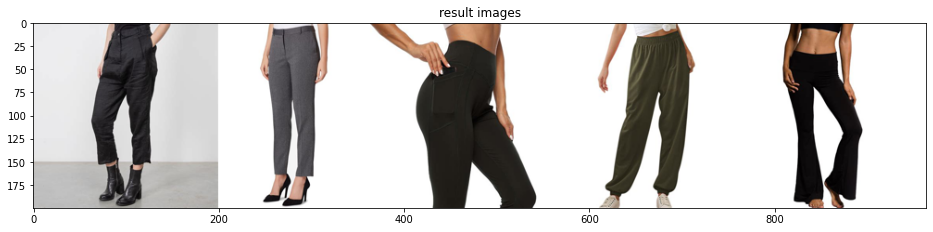

In [ ]:
# do a query on a random image
query_image_idx = int(len(images) * random.random())
# query_image_idx = int(len(images) * int"/content/images/fashion/051_965a27f7.jpg")
# idx_closest = get_closest_images(query_image_idx,5)
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 300)
results_image = get_concatenated_images(idx_closest, 200)

# display the query image
plt.figure(figsize = (5,5))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

1/1 [==============================] - 2s 2s/step


Text(0.5, 1.0, 'result images')

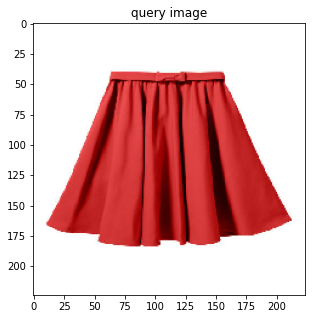

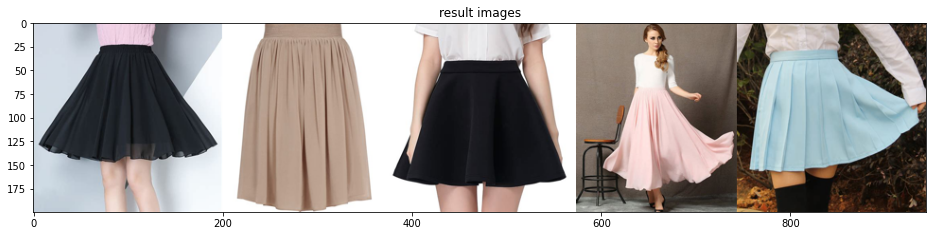

In [ ]:
'''
# load image and extract features
x = keras.utils.load_img("/content/images/fashion/039_8c9e8758.jpg",target_size=model.input_shape[1:3])
new_image = keras.utils.load_img("/content/images/fashion/039_8c9e8758.jpg",target_size=model.input_shape[1:3])

x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(img)

new_features = feat_extractor.predict(x)[0]
#feat = feat_extractor.predict(x)
'''




img = keras.utils.load_img("/content/istockphoto-882157056-612x612.jpg",target_size=model.input_shape[1:3])
x = keras.utils.load_img("/content/istockphoto-882157056-612x612.jpg",target_size=model.input_shape[1:3])
x = np.expand_dims(x, axis=0)
#x = np.array(x)

#x = preprocess_input(x)

feat_ = feat_extractor.predict(x)[0]






# project it into pca space
new_pca_features = pca.transform([feat_])[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.imshow(img)
plt.title("query image")

# display the resulting images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")

In [ ]:
import pickle

pickle.dump([images, pca_features, pca], open('features_caltech101.p', 'wb'))